In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('car data.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [7]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())


['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [8]:
###checking of missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
finaldf=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [12]:
finaldf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
finaldf['current_year']=2022
finaldf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [14]:
finaldf['no_year']=finaldf['current_year']-finaldf['Year']
finaldf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [15]:
finaldf.drop(['Year'],axis=1,inplace=True)
finaldf.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [16]:
finaldf.drop(['current_year'],axis=1,inplace=True)
finaldf.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [17]:
newdf=pd.get_dummies(finaldf["Fuel_Type"])
newdf.head()

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [19]:
merged=pd.concat([finaldf,newdf],axis='columns')
merged.head(4)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year,CNG,Diesel,Petrol
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8,0,0,1
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9,0,1,0
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5,0,0,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11,0,0,1


In [20]:
merged_df=merged.drop(['Fuel_Type','CNG'],axis='columns')
merged_df.head(2)

,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,no_year,Diesel,Petrol
0,3.35,5.59,27000,Dealer,Manual,0,8,0,1
1,4.75,9.54,43000,Dealer,Manual,0,9,1,0


In [21]:
newds=pd.get_dummies(finaldf["Seller_Type"])
newds.head(2)

,Dealer,Individual
0,1,0
1,1,0


In [22]:
mergedds=pd.concat([merged_df,newds],axis='columns')
mergedds.head(2)

,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,no_year,Diesel,Petrol,Dealer,Individual
0,3.35,5.59,27000,Dealer,Manual,0,8,0,1,1,0
1,4.75,9.54,43000,Dealer,Manual,0,9,1,0,1,0


In [23]:
mergedds_df=mergedds.drop(['Seller_Type'],axis='columns')
mergedds_df.head(2)

,Selling_Price,Present_Price,Kms_Driven,Transmission,Owner,no_year,Diesel,Petrol,Dealer,Individual
0,3.35,5.59,27000,Manual,0,8,0,1,1,0
1,4.75,9.54,43000,Manual,0,9,1,0,1,0


In [24]:
nds=pd.get_dummies(finaldf["Transmission"])
nds.head(4)

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1


In [25]:
finalds=pd.concat([mergedds_df,nds],axis='columns')
finalds.head()

,Selling_Price,Present_Price,Kms_Driven,Transmission,Owner,no_year,Diesel,Petrol,Dealer,Individual,Automatic,Manual
0,3.35,5.59,27000,Manual,0,8,0,1,1,0,0,1
1,4.75,9.54,43000,Manual,0,9,1,0,1,0,0,1
2,7.25,9.85,6900,Manual,0,5,0,1,1,0,0,1
3,2.85,4.15,5200,Manual,0,11,0,1,1,0,0,1
4,4.60,6.87,42450,Manual,0,8,1,0,1,0,0,1


In [26]:
final_ds=finalds.drop(['Transmission','Dealer','Automatic'],axis='columns')
final_ds.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Diesel,Petrol,Individual,Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [27]:
final_ds.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Diesel,Petrol,Individual,Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [29]:
import seaborn as sns

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

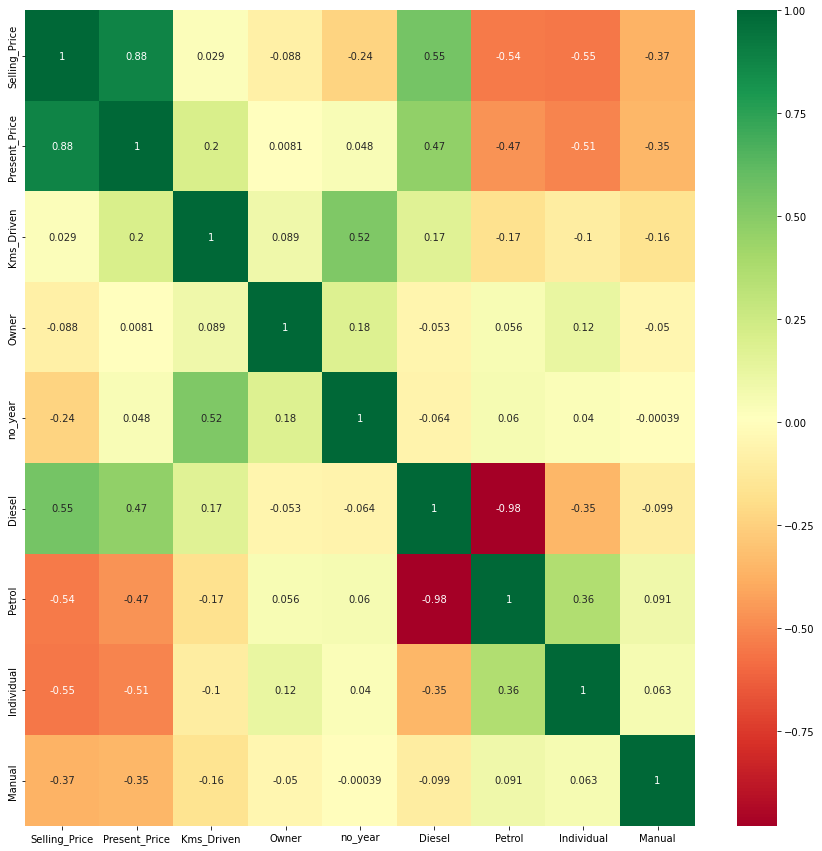

In [31]:
corrmat=final_ds.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(15,15))
#ploting heat map
g=sns.heatmap(final_ds[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [32]:
#####independent variables
X=final_ds.iloc[:,1:]
##dependent variables
y=final_ds.iloc[:,0]

In [33]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Diesel,Petrol,Individual,Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [34]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [35]:
###Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [36]:
print(model.feature_importances_)

[0.37117609 0.04113161 0.00090945 0.07792914 0.23462124 0.00894938
 0.12814559 0.13713749]


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
len(X_train)

240

In [40]:
len(X_test)

61

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [42]:
#hyperparameters
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200,num=12)]
#no. of features to consider at every split
max_features=['auto','sqrt']
#max no. of levels in tree
max_depth=[int(x) for x in np.linspace(5, 30, num=6)]
#max_depth.append(none)
#minimum no. of samples required to split a node
min_samples_split=[2,5,15,100]
#minimum no. of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
#created the random grid
random_grid={'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error',n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)
rf_random.fit(X_train,y_train)


In [ ]:
predictions=rf_random.predict(X_test)
predictions

In [ ]:
sns.distplot(y_test-predictions)

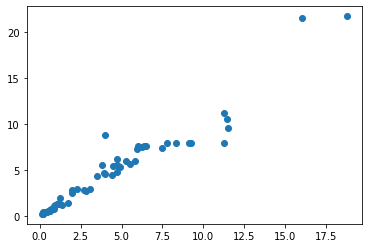

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
import pickle
# open a file, where you want to store data
file = open('random_forest_regression_model.pkl','wb')

# dump information to that file
pickle.dump(rf_random, file)